<a href="https://colab.research.google.com/github/KevinGastelum/MyMachineLearning/blob/main/CryptoPricePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Crypto Price Prediction for:** BTC, ETH, BNB, USDT

Dataset using Crypto Prices from <br>
November 9th 2017 - August 4th 2022

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from google.colab import data_table
data_table.enable_dataframe_formatter()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# You can download Data from Kaggle and place in your drive to load - https://www.kaggle.com/code/himanshunakrani/bitcoin-price-prediction-updated-17-august/data
data = pd.read_csv('/content/drive/MyDrive/crypto_prices_data.csv')

## Exploratory Data Analysis

In [4]:
data.head()

Unnamed: 0        Date  Adj Close (BNB)  Volume (BNB)  Adj Close (BTC)  \
0           0   11/9/2017          1.99077      19192200      7143.580078   
1           1  11/10/2017          1.79684      11155000      6618.140137   
2           2  11/11/2017          1.67047       8178150      6357.600098   
3           3  11/12/2017          1.51969      15298700      5950.069824   
4           4  11/13/2017          1.68662      12238800      6559.490234   

   Volume (BTC)  Adj Close (USDT)  Volume (USDT)  Adj Close (ETH)  \
0    3226249984           1.00818      358188000       320.884003   
1    5208249856           1.00601      756446016       299.252991   
2    4908680192           1.00899      746227968       314.681000   
3    8957349888           1.01247     1466060032       307.907990   
4    6263249920           1.00935      767884032       316.716003   

   Volume (ETH)  
0     893249984  
1     885985984  
2     842300992  
3    1613479936  
4    1041889984

In [5]:
data = data.drop(columns = ['Unnamed: 0'])

In [6]:
data.head()

Date  Adj Close (BNB)  Volume (BNB)  Adj Close (BTC)  Volume (BTC)  \
0   11/9/2017          1.99077      19192200      7143.580078    3226249984   
1  11/10/2017          1.79684      11155000      6618.140137    5208249856   
2  11/11/2017          1.67047       8178150      6357.600098    4908680192   
3  11/12/2017          1.51969      15298700      5950.069824    8957349888   
4  11/13/2017          1.68662      12238800      6559.490234    6263249920   

   Adj Close (USDT)  Volume (USDT)  Adj Close (ETH)  Volume (ETH)  
0           1.00818      358188000       320.884003     893249984  
1           1.00601      756446016       299.252991     885985984  
2           1.00899      746227968       314.681000     842300992  
3           1.01247     1466060032       307.907990    1613479936  
4           1.00935      767884032       316.716003    1041889984

In [12]:
data.shape

(1730, 9)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1730 non-null   object 
 1   Adj Close (BNB)   1730 non-null   float64
 2   Volume (BNB)      1730 non-null   int64  
 3   Adj Close (BTC)   1730 non-null   float64
 4   Volume (BTC)      1730 non-null   int64  
 5   Adj Close (USDT)  1730 non-null   float64
 6   Volume (USDT)     1730 non-null   int64  
 7   Adj Close (ETH)   1730 non-null   float64
 8   Volume (ETH)      1730 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 121.8+ KB


In [16]:
data.isna().sum()

Date                0
Adj Close (BNB)     0
Volume (BNB)        0
Adj Close (BTC)     0
Volume (BTC)        0
Adj Close (USDT)    0
Volume (USDT)       0
Adj Close (ETH)     0
Volume (ETH)        0
dtype: int64

In [15]:
data.describe()

Adj Close (BNB)  Volume (BNB)  Adj Close (BTC)  Volume (BTC)  \
count      1730.000000  1.730000e+03      1730.000000  1.730000e+03   
mean        134.960777  9.647885e+08     20191.519348  2.570080e+10   
std         185.725539  1.486405e+09     17507.045641  2.003526e+10   
min           1.510360  9.284000e+03      3236.761719  2.923670e+09   
25%          13.670646  1.177502e+08      7457.858887  9.718123e+09   
50%          22.234484  3.079566e+08     10330.514649  2.313310e+10   
75%         288.047844  1.467549e+09     35538.384766  3.518178e+10   
max         675.684082  1.798295e+10     67566.828125  3.509679e+11   

       Adj Close (USDT)  Volume (USDT)  Adj Close (ETH)  Volume (ETH)  
count       1730.000000   1.730000e+03      1730.000000  1.730000e+03  
mean           1.001717   4.085393e+10      1105.603148  1.288480e+10  
std            0.005928   3.912941e+10      1233.514214  1.104728e+10  
min            0.966644   3.581880e+08        84.308296  6.217330e+08  
25%            0.999968   4.705288e+09       203.758255  3.844413e+09  
50%            1.000601   3.348729e+10       436.047501  1.047600e+10  
75%            1.002838   6.087353e+10      1828.478180  1.823330e+10  
max            1.077880   2.790675e+11      4812.087402  8.448291e+10

## Visualize Data

In [9]:
plt.figure(figsize = (20, 10))
sns.lineplot(data = data['Adj Close (BNB)'], label = 'BNB')
sns.lineplot(data = data['Adj Close (ETH)'], label = 'ETH')
sns.lineplot(data = data['Adj Close (BTC)'], label = 'BTC')
sns.lineplot(data = data['Adj Close (USDT)'], label = 'USDT')
plt.title('Adjacent Close Price')

Text(0.5, 1.0, 'Adjacent Close Price')

Text(0.5, 1.0, 'Volume')

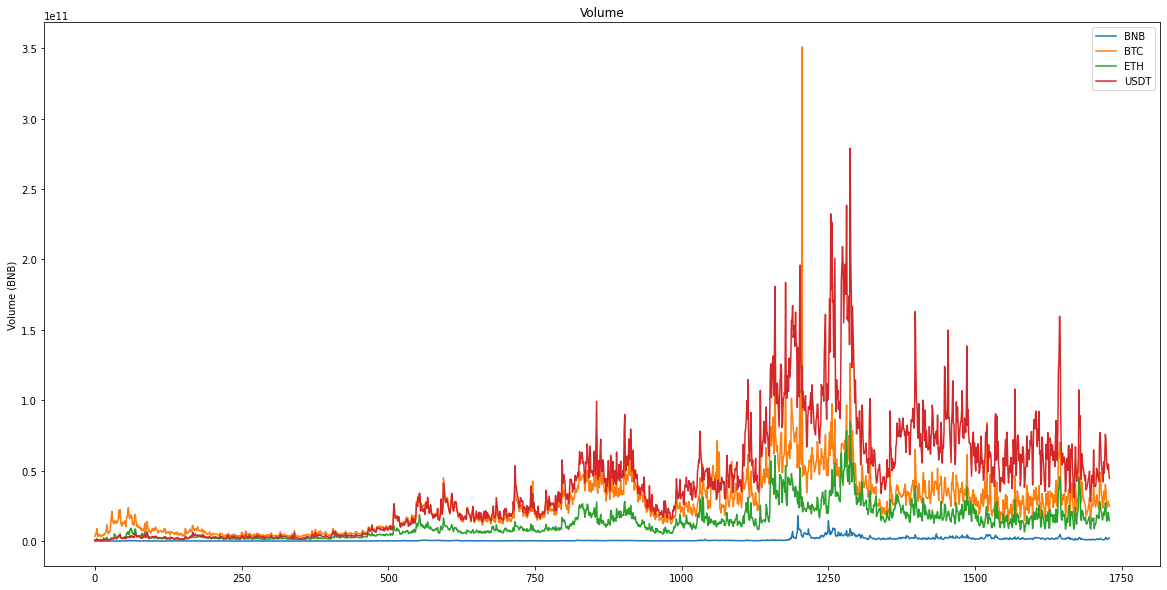

In [10]:
plt.figure(figsize = (20, 10))
sns.lineplot(data = data['Volume (BNB)'], label = 'BNB')
sns.lineplot(data = data['Volume (BTC)'], label = 'BTC')
sns.lineplot(data = data['Volume (ETH)'], label = 'ETH')
sns.lineplot(data = data['Volume (USDT)'], label = 'USDT')
plt.title('Volume')

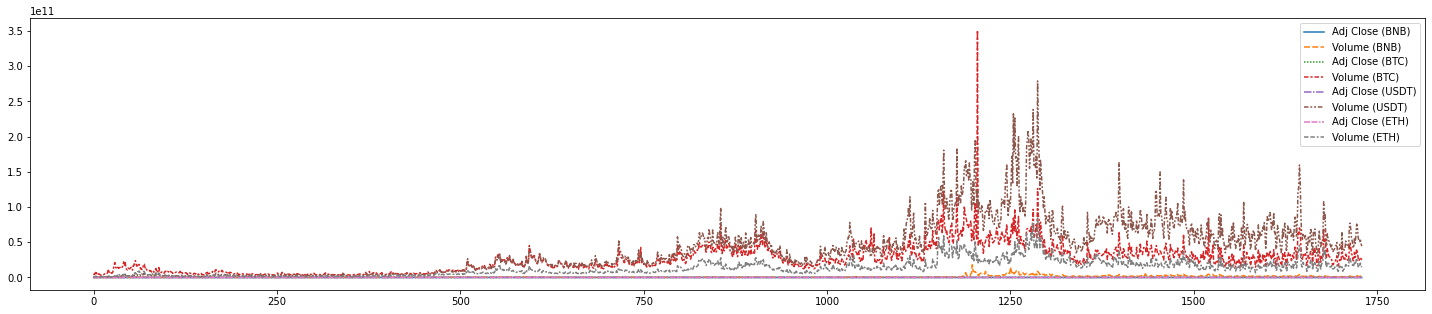

In [17]:
plt.figure(figsize = (25, 5))
sns.lineplot(data=data)

In [18]:
data.hist(figsize=(20,8), layout=(2, 4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f71663d8390>,
      dtype=object)

## Checking Correlation

In [19]:
data.corr()

Adj Close (BNB)  Volume (BNB)  Adj Close (BTC)  \
Adj Close (BNB)          1.000000      0.732715         0.918562   
Volume (BNB)             0.732715      1.000000         0.768149   
Adj Close (BTC)          0.918562      0.768149         1.000000   
Volume (BTC)             0.407226      0.600409         0.573059   
Adj Close (USDT)        -0.154652     -0.117310        -0.151540   
Volume (USDT)            0.659554      0.773426         0.773313   
Adj Close (ETH)          0.962406      0.654506         0.926972   
Volume (ETH)             0.569978      0.699198         0.672594   

                  Volume (BTC)  Adj Close (USDT)  Volume (USDT)  \
Adj Close (BNB)       0.407226         -0.154652       0.659554   
Volume (BNB)          0.600409         -0.117310       0.773426   
Adj Close (BTC)       0.573059         -0.151540       0.773313   
Volume (BTC)          1.000000         -0.095888       0.867511   
Adj Close (USDT)     -0.095888          1.000000      -0.139902   
Volume (USDT)         0.867511         -0.139902       1.000000   
Adj Close (ETH)       0.383787         -0.149685       0.629372   
Volume (ETH)          0.859965         -0.119487       0.948139   

                  Adj Close (ETH)  Volume (ETH)  
Adj Close (BNB)          0.962406      0.569978  
Volume (BNB)             0.654506      0.699198  
Adj Close (BTC)          0.926972      0.672594  
Volume (BTC)             0.383787      0.859965  
Adj Close (USDT)        -0.149685     -0.119487  
Volume (USDT)            0.629372      0.948139  
Adj Close (ETH)          1.000000      0.545473  
Volume (ETH)             0.545473      1.000000

In [25]:
plt.figure(figsize=(18,14))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.CMRmap_r);

In [26]:
sns.pairplot(data.sample(n=100));

In [27]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     | 21.9 MB 153 kB/s
     |████████████████████████████████| 102 kB 7.8 MB/s 
     |████████████████████████████████| 690 kB 43.9 MB/s 
     |████████████████████████████████| 4.7 MB 46.4 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
     |████████████████████████████████| 812 kB 63.0 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=261257 sha256=196ab44698df53ff1dca44a0afd96fa9dc2f5cb182cd85a8cd82c75df405c161
  Stored in directory: /tmp/pip-ephem-wheel-cache-lxwdj2m0/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=38a0a9c8b5557de57a21c3bcbacb7a9892dd50008663793732b7fa48ad1d00d1
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash

In [28]:
import pandas_profiling
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Pre-Processing

In [29]:
X = data.drop(columns = ['Adj Close (BTC)', 'Date'], axis=1)
y = data.loc[:, 'Adj Close (BTC)']

In [30]:
X.head()

Adj Close (BNB)  Volume (BNB)  Volume (BTC)  Adj Close (USDT)  \
0          1.99077      19192200    3226249984           1.00818   
1          1.79684      11155000    5208249856           1.00601   
2          1.67047       8178150    4908680192           1.00899   
3          1.51969      15298700    8957349888           1.01247   
4          1.68662      12238800    6263249920           1.00935   

   Volume (USDT)  Adj Close (ETH)  Volume (ETH)  
0      358188000       320.884003     893249984  
1      756446016       299.252991     885985984  
2      746227968       314.681000     842300992  
3     1466060032       307.907990    1613479936  
4      767884032       316.716003    1041889984

In [31]:
y.head()

0    7143.580078
1    6618.140137
2    6357.600098
3    5950.069824
4    6559.490234
Name: Adj Close (BTC), dtype: float64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [33]:
from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=4)
X_train = fs.fit_transform(X_train, y_train)
X_test = fs.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)


## Feature Selection

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Different ML methods to train our model

In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
# K-Nearest Neighbor
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [38]:
# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
# DecisionTree
dt = tree.DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [40]:
# GradientBoost
est = GradientBoostingRegressor()
est.fit(X_train, y_train)

GradientBoostingRegressor()

## Predictions

In [41]:
# K-Nearest Neighbor Prediction
y_pred_knr = knr.predict(X_test)
r2_knr = metrics.r2_score(y_test, y_pred_knr)

# Random Forest Prediction
y_pred_rf = rf.predict(X_test)
r2rf =  metrics.r2_score(y_test, y_pred_rf)

# DecisionTree Prediction
y_pred_dt = dt.predict(X_test)
r2dt = metrics.r2_score(y_test, y_pred_dt)

# GradientBoost Prediction
y_pred_est = est.predict(X_test)
r2est = metrics.r2_score(y_test, y_pred_est)

In [44]:
print("#"*10, "Accuracy", "#"*10)

print("="*50)
print("K-Nearest Neighbor: ", r2_knr)
print("="*50)


print("="*50)
print("RandomForest: ", r2rf)
print("="*50)


print("="*50)
print("DecisionTree: ", r2dt)
print("="*50)


print("="*50)
print("GradientBoost: ", r2est)
print("="*50)

########## Accuracy ##########
K-Nearest Neighbor:  0.9754033093312223
RandomForest:  0.9767118263284399
DecisionTree:  0.946093392763149
GradientBoost:  0.9683326153306819


## HyperParameter Tuning

In [54]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 100)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 200, num = 20)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [55]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=0, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110, 120,
                                                      130, 140, 150, 160, 170,
                                                      180, 190, 200, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 1

In [56]:
rf_random.best_params_

{'n_estimators': 810,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 190,
 'bootstrap': True}

In [58]:
rf = RandomForestRegressor(**rf_random.best_params_)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
r2rf = metrics.r2_score(y_test, y_pred_rf)

print('='*30)
print(f"Accuracy: {r2rf}")
print('='*30)

Accuracy: 0.977408273955058
